In [10]:
# Ungepaarte Stichprpoben: 
# Vergleich von zwei Gruppen 
import numpy as np
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt
import scipy.stats as st

data_m = np.array([120, 107, 110, 116, 114, 111, 113, 117, 114, 112])
data_f = np.array([110, 111, 107, 108, 110, 105, 107, 106, 111, 111])

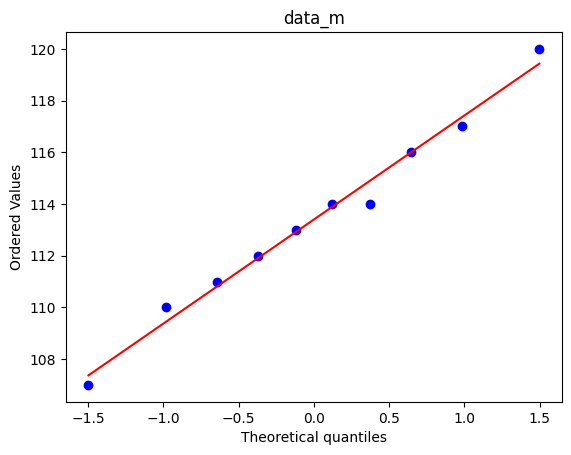

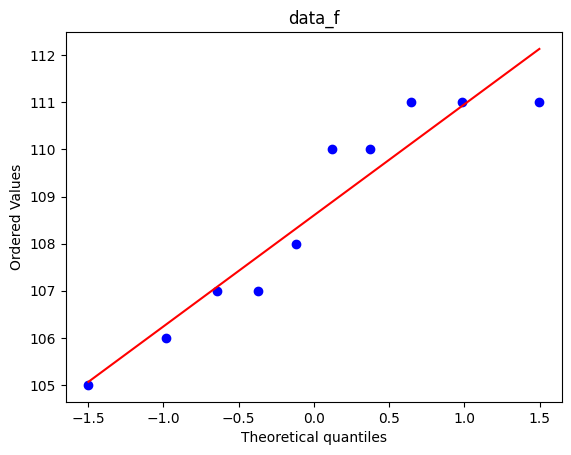

In [15]:
# Prüfen ob Normalverteilt
st.probplot(data_m,plot=plt)
plt.title('data_m')
plt.show()

st.probplot(data_f,plot=plt)
plt.title('data_f')
plt.show()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu_1, mu_2]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 16 seconds.


array([<Axes: title={'center': 'mu_1'}>, <Axes: title={'center': 'mu_2'}>],
      dtype=object)

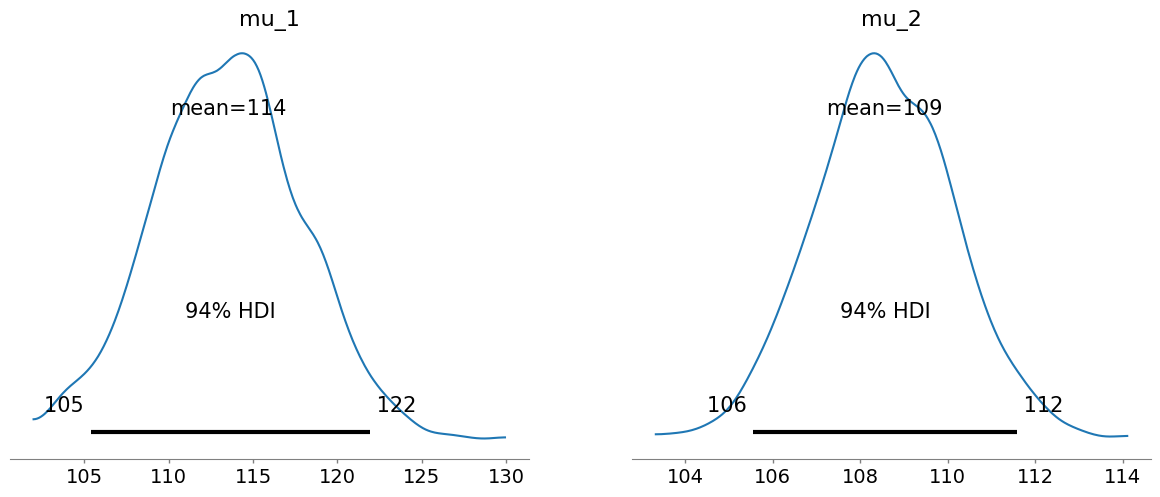

In [16]:
# Berechnen

sigma_m = 13.82 # Standardabweichung der männlichen Gruppe
sigma_f = 5.16 # Standardabweichung der weiblichen Gruppe

lower = 90 # untere Grenze
upper = 130 # obere Grenze

with pm.Model() as model_mul:
    mu_1 = pm.Uniform('mu_1', lower=100, upper=250)
    mu_2 = pm.Uniform('mu_2', lower=100, upper=250)
    y_f  = pm.Normal('y_f', mu=mu_1, sigma=sigma_m, observed=data_m)
    y_m  = pm.Normal('y_m', mu=mu_2, sigma=sigma_f, observed=data_f)
    trace= pm.sample(1000)

az.plot_posterior(trace)
az.summary(trace)

Mögliche Fragestellung: Gibt es einen relevanten Unterschied zwischen datensatz 1 und datensatz 2? 
--> In diesem fall ja, denn das HDI überlappt nicht --> Deutlicher Unterschied